In [35]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import t

In [36]:
#Starting with the OFC data, investigating OFC activity differences between groups 

ofc_rew_pun = pd.read_csv('fslmeants_OFC_pun_and_rew.csv')

In [37]:
ofc_rew_pun.head()

,hc_rew_ofc,fam_rew_ofc,dep_rew_ofc,hc_pun_ofc,fam_pun_ofc,dep_pun_ofc
0,-16.264267,5.640095,14.489992,-11.603929,3.175623,8.536434
1,0.367986,-5.575765,-3.541863,-10.152835,-3.786701,-20.411799
2,5.457938,-6.131224,10.955461,-0.308968,-15.153145,-9.430983
3,12.496756,7.240534,5.572285,10.474185,-6.187288,12.620620
4,-9.786061,20.663324,10.953863,-4.027060,3.018639,-6.366891


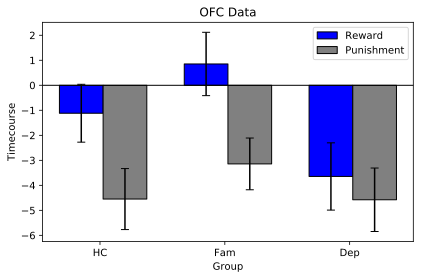

In [38]:
%config InlineBackend.figure_format = 'svg'

# data to plot
n_groups = 3 #HC, FAM, DEP
reward_means = (ofc_rew_pun["hc_rew_ofc"].mean(), ofc_rew_pun["fam_rew_ofc"].mean(), ofc_rew_pun["dep_rew_ofc"].mean())
punish_means = (ofc_rew_pun["hc_pun_ofc"].mean(), ofc_rew_pun["fam_pun_ofc"].mean(), ofc_rew_pun["dep_pun_ofc"].mean())

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

reward_bars = plt.bar(index, reward_means, bar_width,
alpha=opacity,
edgecolor="#000000",
linewidth=1,
color='b',
yerr=(ofc_rew_pun["hc_rew_ofc"].std()/math.sqrt(105),ofc_rew_pun["fam_rew_ofc"].std()/math.sqrt(103),ofc_rew_pun["dep_rew_ofc"].std()/math.sqrt(71)),
capsize=4,
label='Reward')

punish_bars = plt.bar(index + bar_width, punish_means, bar_width,
alpha=opacity,
edgecolor="#000000",
linewidth=1,
color='grey',
yerr=(ofc_rew_pun["hc_pun_ofc"].std()/math.sqrt(105), ofc_rew_pun["fam_pun_ofc"].std()/math.sqrt(103),ofc_rew_pun["dep_pun_ofc"].std()/math.sqrt(71)),
capsize=4,
label='Punishment')

plt.xlabel('Group')
plt.ylabel('Timecourse')
plt.title('OFC Data')
plt.xticks(index + bar_width-0.2, ('HC', 'Fam', 'Dep'))
plt.legend()
plt.axhline(linewidth=1, color='black')

plt.tight_layout()
plt.show()

In [39]:
# Next, we analyze the VS activity during reward and punishment trials

vs_rew_pun = pd.read_csv('fslmeants_VS_pun_and_rew.csv')
vs_rew_pun.head()

,hc_rew_vs,fam_rew_vs,dep_rew_vs,hc_pun_vs,fam_pun_vs,dep_pun_vs
0,-6.176461,11.199091,9.707134,2.276895,1.025934,1.062848
1,-4.020803,-5.342815,-8.841115,-21.245386,-14.188679,-38.239259
2,5.614238,11.425370,4.689602,-5.053195,8.852017,-4.653253
3,-5.903246,3.345832,30.870531,-2.649513,10.672593,34.795301
4,-5.529677,6.918260,-11.556165,-16.987589,-17.063283,-28.891559


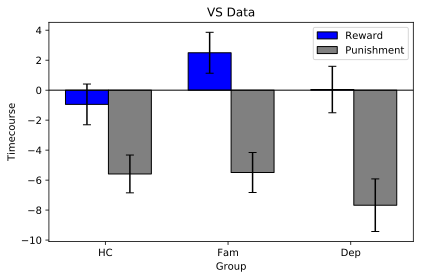

In [40]:
%config InlineBackend.figure_format = 'svg'

# data to plot
n_groups = 3 #HC, FAM, DEP
reward_means = (vs_rew_pun["hc_rew_vs"].mean(), vs_rew_pun["fam_rew_vs"].mean(), vs_rew_pun["dep_rew_vs"].mean())
punish_means = (vs_rew_pun["hc_pun_vs"].mean(), vs_rew_pun["fam_pun_vs"].mean(), vs_rew_pun["dep_pun_vs"].mean())

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

reward_bars = plt.bar(index, reward_means, bar_width,
alpha=opacity,
edgecolor="#000000",
linewidth=1,
color='b',
yerr=(vs_rew_pun["hc_rew_vs"].std()/math.sqrt(105),vs_rew_pun["fam_rew_vs"].std()/math.sqrt(103),vs_rew_pun["dep_rew_vs"].std()/math.sqrt(71)),
capsize=4,
label='Reward')

punish_bars = plt.bar(index + bar_width, punish_means, bar_width,
alpha=opacity,
edgecolor="#000000",
linewidth=1,
color='grey',
yerr=(vs_rew_pun["hc_pun_vs"].std()/math.sqrt(105), vs_rew_pun["fam_pun_vs"].std()/math.sqrt(103),vs_rew_pun["dep_pun_vs"].std()/math.sqrt(71)),
capsize=4,
label='Punishment')

plt.xlabel('Group')
plt.ylabel('Timecourse')
plt.title('VS Data')
plt.xticks(index + bar_width-0.2, ('HC', 'Fam', 'Dep'))
plt.legend()
plt.axhline(linewidth=1, color='black')

plt.tight_layout()
plt.show()

In [29]:
#VS T-Test

# Comparisons: DEP VS HC, FAM VS DEP, FAM VS HC (All reward)
dep_n=71
fam_n=103
hc_n=105

df_famvhc = fam_n + hc_n - 2

sed_famvhc = math.sqrt((vs_rew_pun["fam_rew_vs"].std()/math.sqrt(103))**2 + (vs_rew_pun["hc_rew_vs"].std()/math.sqrt(105))**2) #use ** instead of ^

t_stat_famvhc = (vs_rew_pun["fam_rew_vs"].mean() - vs_rew_pun["hc_rew_vs"].mean()) / sed_famvhc

alpha_famvhc = 0.05

criticalvalue_famvhc = t.ppf(1.0 - alpha_famvhc, df_famvhc)
p_famvhc = (1.0 - t.cdf(abs(t_stat_famvhc), df_famvhc)) * 2.0

#FULL RESULTS
print('t-stat is:',t_stat_famvhc,
      'degrees of freedom is:',df_famvhc, 'critical value is:',criticalvalue_famvhc,'p-value:', p_famvhc)

# t = (mean(X1) - mean(X2)) / sed
# sed = sqrt(se1^2 + se2^2)
# Where X1 and X2 are the first and second data samples
# sed is the standard error of the difference between the means.
# Calculate standard error of the difference between the means:



t-stat is: 1.786127175314017 degrees of freedom is: 206 critical value is: 1.6522841441882308 p-value: 0.07554947135312307


In [32]:
df_famvdep = fam_n + dep_n - 2

sed_famvdep = math.sqrt((vs_rew_pun["fam_rew_vs"].std()/math.sqrt(103))**2 + (vs_rew_pun["dep_rew_vs"].std()/math.sqrt(71))**2) #use ** instead of ^

t_stat_famvdep = (vs_rew_pun["fam_rew_vs"].mean() - vs_rew_pun["dep_rew_vs"].mean()) / sed_famvdep

alpha_famvdep = 0.05

criticalvalue_famvdep = t.ppf(1.0 - alpha_famvdep, df_famvdep)
p_famvdep = (1.0 - t.cdf(abs(t_stat_famvdep), df_famvdep)) * 2.0

#FULL RESULTS
print('t-stat is:',t_stat_famvdep,
      'degrees of freedom is:',df_famvdep, 'critical value is:',criticalvalue_famvdep,'p-value:', p_famvdep)


t-stat is: 1.1858018502302927 degrees of freedom is: 172 critical value is: 1.6537609493607581 p-value: 0.23733611795688958


In [34]:
df_hcvdep = hc_n + dep_n - 2

sed_hcvdep = math.sqrt((vs_rew_pun["hc_rew_vs"].std()/math.sqrt(105))**2 + (vs_rew_pun["dep_rew_vs"].std()/math.sqrt(71))**2) #use ** instead of ^

t_stat_hcvdep = (vs_rew_pun["hc_rew_vs"].mean() - vs_rew_pun["dep_rew_vs"].mean()) / sed_hcvdep

alpha_hcvdep = 0.05

criticalvalue_hcvdep = t.ppf(1.0 - alpha_hcvdep, df_hcvdep)
p_hcvdep = (1.0 - t.cdf(abs(t_stat_hcvdep), df_hcvdep)) * 2.0

#FULL RESULTS
print('t-stat is:',t_stat_hcvdep,
      'degrees of freedom is:',df_hcvdep, 'critical value is:',criticalvalue_hcvdep,'p-value:', p_hcvdep)

t-stat is: -0.481601978195039 degrees of freedom is: 174 critical value is: 1.653658016514993 p-value: 0.6306938688952166

t-stat is: -0.481601978195039 degrees of freedom is: 174 critical value is: 1.653658016514993 p-value: 0.6306938688952166
